#Introduction
y — has the loan applicant defaulted on his loan? (binary: “1”, means “Yes”, “0” means “No”)

In [ ]:
from google.colab import drive
drive.mount("/content/grive")

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, f1_score, recall_score, precision_score

In [168]:
df=pd.read_excel("/content/grive/MyDrive/Bank credit risk LG/Bank Default.xlsx")

#We create unseen data from the oreginal ones

In [171]:
data_unseen=df.loc[:,df.columns!="y"]
data_unseen=data_unseen.sample(n=1000)
data_unseen
print(len(data_unseen))
print("")
print(len(df))

1000

41188


In [172]:
df = df.drop(data_unseen.index)
len(df)

40188

In [ ]:
df

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [173]:
df.columns

Index(['loan_applicant_id', 'age', 'education', 'years_with_current_employer',
       'years_at_current_address', 'household_income', 'debt_to_income_ratio',
       'credit_card_debt', 'other_debt', 'y'],
      dtype='object')

First thing first, we investigate if we have any na values

In [ ]:
df.isnull().sum()
df.head()
df.dtypes
df.describe()

Education is the onlyh variable that is a string. So we have to transform to integer by using one-hot-encoding.

In [ ]:
df["education"].unique()
print(pd.get_dummies(df["education"]))
#df['team'] = pd.factorize(df['team'])[0] we cant use factorise to machine learning models due to after factorise somehow create an order to values
# 1<2<3 and this not somethink that we are looking for. So the usage of one hot encoding is unidirectional.


In [176]:
dummies=pd.get_dummies(df["education"])
dummies=pd.DataFrame(dummies)

In [ ]:
df=pd.concat([df,dummies],axis=1)
del df["education"]
df

#Descriptive statistic 

In [178]:
df.columns

Index(['loan_applicant_id', 'age', 'years_with_current_employer',
       'years_at_current_address', 'household_income', 'debt_to_income_ratio',
       'credit_card_debt', 'other_debt', 'y', 'basic', 'high.school',
       'illiterate', 'professional.course', 'university.degree'],
      dtype='object')

In [179]:
numeric2=df[['age', 'years_with_current_employer','years_at_current_address', 'household_income', 'debt_to_income_ratio','credit_card_debt', 'other_debt']]

In [ ]:
# Example 8 - Investigating the distribution 
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in numeric2:
    x = df[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = df[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

For the outliers 

In [ ]:
# Example 8 - Investigating the outliers
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in numeric2:
    x = df[n].values
    sns.boxplot(x, color = 'blue')
    plt.title(n)
    plt.show()

As we can see both of  the variables other debt and credit card debt have many outliers.

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.kdeplot( df["age"].loc[df["y"] == 0], hue=df["y"], shade=True)
sns.kdeplot( df["age"].loc[df["y"] == 1], hue=df["y"], shade=True)

In [ ]:
df["age"].loc[df["y"] == 0].describe()
df["age"].loc[df["y"] == 1].describe()

#SMOTE ALGORITHM 

In [180]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X=df.loc[:,(df.columns != "y") & (df.columns !="loan_applicant_id")]
y=df["y"]


In [181]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [182]:
smote=SMOTE()
smote_X, smote_Y=smote.fit_resample(X_train,Y_train)

##Scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(smote_X)

In [35]:
#smote_X=pd.DataFrame(smote_X,columns=X.columns)
#smote_X
#smote_Y=pd.DataFrame(data=smote_Y)

###Logistic Reggresion

In [185]:
model_1=LogisticRegression()
model_1.fit(smote_X,smote_Y)

y_pred=model_1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###Metrics of Logistic Regression

In [186]:
print("\033[1m the f1_score of the modes is :",f1_score(Y_test,y_pred))
print("\n")
print("\033[1m the recall score is:",recall_score(Y_test,y_pred))
print()
print("\033[1m the precision score is:",precision_score(Y_test,y_pred))
print()
print("\033[1m the confusion matrix is:",print(confusion_matrix(Y_test,y_pred)))

 the f1_score of the modes is : 0.5861434702636419


 the recall score is: 0.5090521831735889

 the precision score is: 0.6907514450867052

[[6885  214]
 [ 461  478]]
 the confusion matrix is: None


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7099
           1       0.69      0.51      0.59       939

    accuracy                           0.92      8038
   macro avg       0.81      0.74      0.77      8038
weighted avg       0.91      0.92      0.91      8038





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


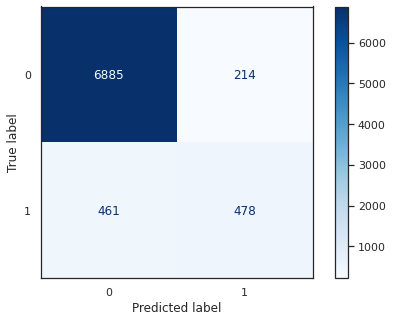

In [187]:
print(classification_report(Y_test,y_pred))
print("\n")
fig, ax=plt.subplots(figsize=(8,5))

#sns.heatmap()
matrix=confusion_matrix(Y_test,y_pred)
#plt.confusion_matrix(Y_test,y_pred,show_absolute=True,show_normed=True,colorbar=True)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_1, X_test,Y_test ,cmap=plt.cm.Blues,colorbar=True,ax=ax)

#sns.heatmap(matrix,annot=True,ax=ax)


In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
print(roc_auc_score(Y_test, model_1.predict(X_test)))

0.7394535461578606


In [189]:
y_pred_prob=model_1.predict_proba(X_test)[:,1]
fpr, tpr, threshold=roc_curve(Y_test,y_pred_prob)

gmeans=sqrt(tpr*(1-fpr))
gmeans
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.368514, G-Mean=0.742


### The roc auc score is 0.741748834426455

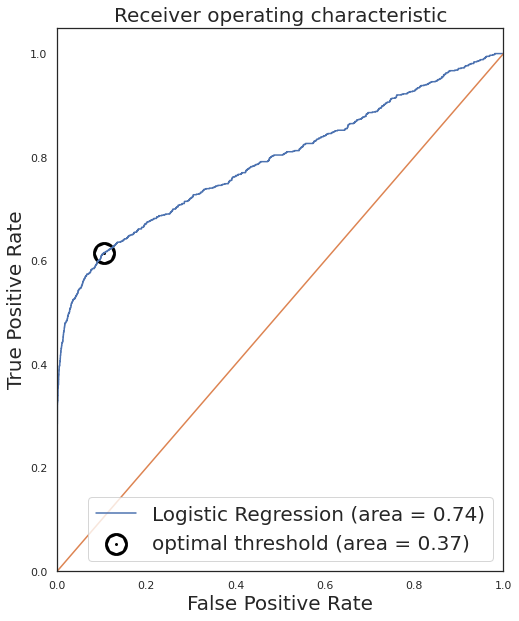

In [192]:
logit_roc_auc = roc_auc_score(Y_test, model_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,10))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.scatter(fpr[ix],tpr[ix],marker=".",linewidth=20,label="optimal threshold (area = %0.2f)" % threshold[ix],color="black")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate",fontsize=20)
plt.ylabel("True Positive Rate",fontsize=20)
plt.title("Receiver operating characteristic",fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.savefig("Log_ROC")
plt.show()

#Optimazitation

In [ ]:
#param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1','l2']}
param_grid=[{"penalty":["l1","l2","elasticnet","none"],"C":np.logspace(-4,4,20)}]

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
#weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
#param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#Gridsearch for hyperparam tuning

model_2= GridSearchCV(estimator= lr,param_grid=param_grid,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y

model_2.fit(smote_X,smote_Y)

In [194]:
# print best hyperparameters
print("Best F1 score: ", model_2.best_score_)
print("\n")
print("Best hyperparameters: ", model_2.best_params_)


Best F1 score:  0.9037521356037093


Best hyperparameters:  {'C': 206.913808111479, 'penalty': 'l2'}


In [ ]:
#Building Model again with best params
model_2=LogisticRegression(C=206.913808111479,penalty="l2")
model_2.fit(smote_X,smote_Y)

In [196]:
y_pred=model_2.predict(X_test)

y_pred_prob=model_2.predict_proba(X_test)[:,1]


###Metrics Optimazitation

In [201]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [ ]:
print(roc_auc_score(Y_test, model_2.predict(X_test)))
print()
print("033[1m this is the f_1 score:",f1_score(Y_test,y_pred))
print("")
recall_score(Y_test,y_pred)
print("")
plot_confusion_matrix(model_2,X_test,Y_test,colorbar=True)
#plot_confusion_matrix(model_1, X_test,Y_test ,cmap=plt.cm.Blues,colorbar=True,ax=ax)

In [ ]:
roc_auc_score(Y_test, model_2.predict(X_test))
print("")
print(classification_report(Y_test,y_pred))

In [199]:
fpr, tpr, threshold=roc_curve(Y_test,y_pred_prob)
gmeans=sqrt(tpr*(1-fpr))
gmeans
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.289700, G-Mean=0.746


In [ ]:
plt.figure(figsize=(8,8))
plt.plot( [0,1],[0,1],linestyle="--",linewidth=1,label="no skil")
#plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot(fpr, tpr,linestyle="solid",label="logistic regression  (area = %0.2f)" % logit_roc_auc)
plt.scatter(fpr[ix],tpr[ix],marker=".",linewidth=20,label="optimal threshold")
plt.title("roc curve optimazition",fontsize=20)
plt.xlabel("fpr",fontsize=20)
plt.ylabel("tpr",fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

##Log Loss 

In [124]:
pred_proba_t = model_2.predict_proba(X_test)
log_loss = log_loss(y_pred, pred_proba_t)   
log_loss

0.19139731180393008

#Optimazitation with feature selection

In [125]:
del final_fi

In [126]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into X & y

#X_columns = new_raw_data.drop(['Transported','PassengerId','Name'], axis = 1)
#y = new_raw_data['Transported']


# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(smote_X,smote_Y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Calculating FI
for i, column in enumerate(X.columns):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

#final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi.sort_values(by="Feature Importance Score",ascending=False)

Importance of feature age:, 0.004
Importance of feature years_with_current_employer:, 0.010
Importance of feature years_at_current_address:, 0.007
Importance of feature household_income:, 0.378
Importance of feature debt_to_income_ratio:, 0.158
Importance of feature credit_card_debt:, 0.006
Importance of feature other_debt:, 0.004
Importance of feature basic:, 0.026
Importance of feature high.school:, 0.050
Importance of feature illiterate:, 0.242
Importance of feature professional.course:, 0.080
Importance of feature university.degree:, 0.034


,Variable,Feature Importance Score
3,household_income,0.377845
9,illiterate,0.241642
4,debt_to_income_ratio,0.158425
10,professional.course,0.080404
8,high.school,0.049586
11,university.degree,0.034413
7,basic,0.026313
1,years_with_current_employer,0.009843
2,years_at_current_address,0.007167
5,credit_card_debt,0.006281


In [127]:
X_train=smote_X[["household_income","years_at_current_address","credit_card_debt","debt_to_income_ratio","age","professional.course","high.school","university.degree","basic"]]
y=smote_Y
X_testaki=X_test[["household_income","years_at_current_address","credit_card_debt","debt_to_income_ratio","age","professional.course","high.school","university.degree","basic"]]

In [ ]:
#param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1','l2']}
param_grid=[{"penalty":["l1","l2","elasticnet","none"],"C":np.logspace(-4,4,20)}]

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
#weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
#param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#Gridsearch for hyperparam tuning

model_2= GridSearchCV(estimator= lr,param_grid=param_grid,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y

model_2.fit(X_train,y)

In [129]:
# print best hyperparameters
print("Best F1 score: ", model_2.best_score_)
print("\n")
print("Best hyperparameters: ", model_2.best_params_)

Best F1 score:  0.8137367154161342


Best hyperparameters:  {'C': 1.623776739188721, 'penalty': 'l2'}


In [130]:
#logreg=LogisticRegression()

model_3=LogisticRegression(C=1.623776739188721,penalty="l2")
model_3.fit(X_train,y)
y_pred=model_3.predict(X_testaki)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("\033[1m the f1 score is:",f1_score(Y_test,y_pred))
print("")
print("\033[1m the recall_score  is:",recall_score(Y_test,y_pred))
print("")
print("\033[1m the recall_score  is:",print(confusion_matrix(Y_test,y_pred)))

In [ ]:
#pred_proba_t = logreg.predict_proba(X_testaki)
#log_loss = log_loss(y_pred, pred_proba_t)
#log_loss

In [140]:
print(f1_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))
print(roc_auc_score(Y_test,y_pred))
#print(classification_report(Y_test,y_pred))
precision_score(Y_test,y_pred)

0.3650273224043715
0.5439739413680782
0.6815810666249985


0.2746710526315789

#Forecast to Unseen  loan applicants

The best model is the model_2

In [205]:
final=pd.get_dummies(data_unseen)
del final["loan_applicant_id"]

In [ ]:
final

In [ ]:
data_unseen["PD"] = model_2.predict_proba(final)[:,1]
data_unseen["y"]=model_2.predict(final)
#

In [ ]:
data_unseen[["loan_applicant_id", "PD","y"]].head(10)

##As we have forcast all the probabilities then we can combine the predictions with the original data.
That is we dont need to have dummies variables and we just take the PD columns and combine it the original data

In [ ]:
data_unseen

In [213]:
data_unseen["Prediction Default"]=np.where(data_unseen["y"]==1,"Yes","No")

In [215]:
data_unseen.to_excel("Final_Defaults.xlsx")